# Question 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import math

In [ ]:
# Functions to calculate alpha and beta for each ion at a given voltage
def alpha_m(V):
  if (V == 25):
    return alpha_m(V+.01)
  return 0.1*(25-V)/(math.exp((25 - V)/10)-1)
def beta_m(V): 
  return 4*math.exp(-1*V/18)
def alpha_h(V):
  return 0.07*math.exp(-1*V/20)
def beta_h(V):
  if (V == 3):
    return beta_h(V+0.01)
  return 1/(math.exp((30-V)/10)+1)
def alpha_n(V):
  if (V == 10):
    return alpha_n(V+0.01)
  return (0.01*(10-V))/(math.exp((10-V)/10)-1)
def beta_n(V):
  return 0.125*math.exp(-1*V/80)

# Define constants 
C = 1
gk_max = 36; gna_max = 120; gl_max = 0.3;
Ek = -12; Ena = 115; El = 10.6;
Ri = 0.035

# Functions that return the value of a derivative 
def V_prime(i, current):
  I = 0
  if (i < 1000):
    I = current
  return (1/C)*(gna_max*m[i-1]**3*h[i-1]*(Ena-V[i-1])+gk_max*n[i-1]**4*(Ek-V[i-1])+gl_max*(El-V[i-1])+I)
def m_prime(i):
  return alpha_m(V[i-1])*(1-m[i-1])-beta_m(V[i-1])*m[i-1]
def n_prime(i): 
  return alpha_n(V[i-1])*(1-n[i-1])-beta_n(V[i-1])*n[i-1]
def h_prime(i):
  return alpha_h(V[i-1])*(1-h[i-1])-beta_h(V[i-1])*h[i-1]

# Unmyelinated constants 
u_d = 0.05; u_dx = 0.1
u_const = u_d/(4*Ri*u_dx*u_dx)
# Unmyelinated derivative functions
def u_V_prime(t, k, current):
  I = 0
  if ((t < 1000) and (k == 0)):
    I = current
  else:
    I = 0
  if (k == 0):
    return (1/C)*(u_const*(V[t][k+1]-V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
  if (k == 99):
    return (1/C)*(u_const*(V[t][k-1]-V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
  return (1/C)*(u_const*(V[t][k+1]+V[t][k-1]-2*V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
def u_m_prime(t, k):
  return alpha_m(V[t][k])*(1-m[t][k])-beta_m(V[t][k])*m[t][k]
def u_n_prime(t, k): 
  return alpha_n(V[t][k])*(1-n[t][k])-beta_n(V[t][k])*n[t][k]
def u_h_prime(t, k):
  return alpha_h(V[t][k])*(1-h[t][k])-beta_h(V[t][k])*h[t][k]

# Myelinated constants
m_d = 0.001; m_L = 0.1; m_l = 0.0002
m_const = m_d/(4*Ri*m_L*m_l)
def m_V_prime(t, k, current):
  I = 0
  if ((t < 2000) and (k == 0)):
    I = current
  else:
    I = 0
  if (k == 0):
    return (1/C)*(m_const*(V[t][k+1]-V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
  if (k == 99):
    return (1/C)*(u_const*(V[t][k-1]-V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
  return (1/C)*(u_const*(V[t][k+1]+V[t][k-1]-2*V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)


In [ ]:
# Create 2D arrays that will hold V(t,k), m(t,k), h(t,k), n(t,k)
segments = 100 
time = np.arange(0, 25, .001)
rows, cols = len(time), segments 
V = [[0 for t in range(cols)] for k in range(rows)]
m = [[0 for t in range(cols)] for k in range(rows)]
h = [[0 for t in range(cols)] for k in range(rows)]
n = [[0 for t in range(cols)] for k in range(rows)]

In [ ]:
# Initialize each segment with starting values 
for k in range(0, segments): 
  V[0][k] = 0
  m[0][k] = 0.053
  n[0][k] = 0.318
  h[0][k] = 0.596

dt = 0.001 
first_current = 200
# Iterate through time and space
for t in range(1, len(time)):
  for k in range(0, segments):
    V[t][k] = V[t-1][k] + dt * u_V_prime(t-1, k, first_current)
    m[t][k] = m[t-1][k] + dt * u_m_prime(t-1, k)
    n[t][k] = n[t-1][k] + dt * u_n_prime(t-1, k)
    h[t][k] = h[t-1][k] + dt * u_h_prime(t-1, k)

REGULAR CONDUCTANCE VALUES
Average conduction velocity: 12.756508999718545 m/s


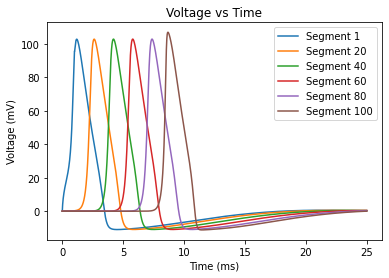

In [ ]:
 # Plot the action potentials over time at different space points
seg_1 = []
seg_20 = []
seg_40 = []
seg_60 = []
seg_80 = []
seg_100 = []
for t in range (0, len(time)):
  seg_1.append(V[t][0])
  seg_20.append(V[t][19])
  seg_40.append(V[t][39])
  seg_60.append(V[t][59])
  seg_80.append(V[t][79])
  seg_100.append(V[t][99])
plt.plot(time, seg_1)
plt.plot(time, seg_20)
plt.plot(time, seg_40)
plt.plot(time, seg_60)
plt.plot(time, seg_80)
plt.plot(time, seg_100)
plt.title("Voltage vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(["Segment 1", "Segment 20", "Segment 40", "Segment 60", "Segment 80", "Segment 100"])
# Calculating average conduction velocity 
peak_indices = []
peak_indices.append(seg_1.index(max(seg_1)))
peak_indices.append(seg_20.index(max(seg_20)))
peak_indices.append(seg_40.index(max(seg_40)))
peak_indices.append(seg_60.index(max(seg_60)))
peak_indices.append(seg_80.index(max(seg_80)))
peak_indices.append(seg_100.index(max(seg_100)))
velocities = []
for i in range(1, len(peak_indices)):
  velocities.append(.019 / ((peak_indices[i] - peak_indices[i-1]) / 1000000))
print("REGULAR CONDUCTANCE VALUES")
print("Average conduction velocity: " + str(sum(velocities) / len(velocities)) + " m/s")

# Question 2

In [ ]:
# 3% values
gk_max = 0.03*36; gna_max = 0.03*120; gl_max = 0.03*0.3;

3% CONDUCTION VALUES


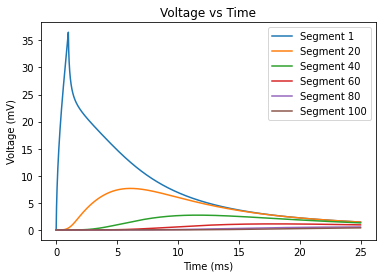

In [ ]:
# Create 2D arrays that will hold V(t,k), m(t,k), h(t,k), n(t,k)
segments = 100 
time = np.arange(0, 25, .001)
rows, cols = len(time), segments 
V = [[0 for t in range(cols)] for k in range(rows)]
m = [[0 for t in range(cols)] for k in range(rows)]
h = [[0 for t in range(cols)] for k in range(rows)]
n = [[0 for t in range(cols)] for k in range(rows)]
# Initialize each segment with starting values 
for k in range(0, segments): 
  V[0][k] = 0
  m[0][k] = 0.053
  n[0][k] = 0.318
  h[0][k] = 0.596

dt = 0.001 
first_current = 200
# Iterate through time and space
for t in range(1, len(time)):
  for k in range(0, segments):
    V[t][k] = V[t-1][k] + dt * u_V_prime(t-1, k, first_current)
    m[t][k] = m[t-1][k] + dt * u_m_prime(t-1, k)
    n[t][k] = n[t-1][k] + dt * u_n_prime(t-1, k)
    h[t][k] = h[t-1][k] + dt * u_h_prime(t-1, k)
 # Plot the action potentials over time at different space points
seg_1 = []
seg_20 = []
seg_40 = []
seg_60 = []
seg_80 = []
seg_100 = []
for t in range (0, len(time)):
  seg_1.append(V[t][0])
  seg_20.append(V[t][19])
  seg_40.append(V[t][39])
  seg_60.append(V[t][59])
  seg_80.append(V[t][79])
  seg_100.append(V[t][99])
plt.plot(time, seg_1)
plt.plot(time, seg_20)
plt.plot(time, seg_40)
plt.plot(time, seg_60)
plt.plot(time, seg_80)
plt.plot(time, seg_100)
plt.title("Voltage vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(["Segment 1", "Segment 20", "Segment 40", "Segment 60", "Segment 80", "Segment 100"])
print("3% CONDUCTION VALUES")

In [ ]:
# 10% values
gk_max = 0.10*36; gna_max = 0.10*120; gl_max = 0.10*0.3;

10% CONDUCTION VALUES


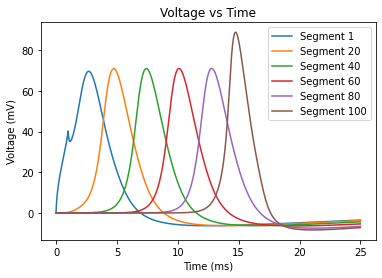

In [ ]:
# Create 2D arrays that will hold V(t,k), m(t,k), h(t,k), n(t,k)
segments = 100 
time = np.arange(0, 25, .001)
rows, cols = len(time), segments 
V = [[0 for t in range(cols)] for k in range(rows)]
m = [[0 for t in range(cols)] for k in range(rows)]
h = [[0 for t in range(cols)] for k in range(rows)]
n = [[0 for t in range(cols)] for k in range(rows)]
# Initialize each segment with starting values 
for k in range(0, segments): 
  V[0][k] = 0
  m[0][k] = 0.053
  n[0][k] = 0.318
  h[0][k] = 0.596

dt = 0.001 
first_current = 200
# Iterate through time and space
for t in range(1, len(time)):
  for k in range(0, segments):
    V[t][k] = V[t-1][k] + dt * u_V_prime(t-1, k, first_current)
    m[t][k] = m[t-1][k] + dt * u_m_prime(t-1, k)
    n[t][k] = n[t-1][k] + dt * u_n_prime(t-1, k)
    h[t][k] = h[t-1][k] + dt * u_h_prime(t-1, k)
 # Plot the action potentials over time at different space points
seg_1 = []
seg_20 = []
seg_40 = []
seg_60 = []
seg_80 = []
seg_100 = []
for t in range (0, len(time)):
  seg_1.append(V[t][0])
  seg_20.append(V[t][19])
  seg_40.append(V[t][39])
  seg_60.append(V[t][59])
  seg_80.append(V[t][79])
  seg_100.append(V[t][99])
plt.plot(time, seg_1)
plt.plot(time, seg_20)
plt.plot(time, seg_40)
plt.plot(time, seg_60)
plt.plot(time, seg_80)
plt.plot(time, seg_100)
plt.title("Voltage vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(["Segment 1", "Segment 20", "Segment 40", "Segment 60", "Segment 80", "Segment 100"])
print("10% CONDUCTION VALUES")

# Question 3

In [ ]:
gk_max = 36; gna_max = 120; gl_max = 0.3;

MYELINATED AXON
Average conduction velocity: 53.49323687442793 m/s


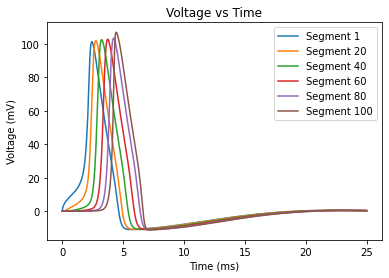

In [ ]:
# Myelinated constants

m_d = 0.001; m_L = 0.1; m_l = 0.0002
m_const = m_d/(4*Ri*m_L*m_l)
def m_V_prime(t, k, current):
  I = 0
  if ((t < 2000) and (k == 0)):
    I = current
  else:
    I = 0
  if (k == 0):
    return (1/C)*(m_const*(V[t][k+1]-V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
  if (k == 99):
    return (1/C)*(m_const*(V[t][k-1]-V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)
  return (1/C)*(m_const*(V[t][k+1]+V[t][k-1]-2*V[t][k]) + gna_max*m[t][k]**3*h[t][k]*(Ena-V[t][k])+gk_max*n[t][k]**4*(Ek-V[t][k])+gl_max*(El-V[t][k])+I)

# Create 2D arrays that will hold V(t,k), m(t,k), h(t,k), n(t,k)
segments = 100 
time = np.arange(0, 25, .001)
rows, cols = len(time), segments 
V = [[0 for t in range(cols)] for k in range(rows)]
m = [[0 for t in range(cols)] for k in range(rows)]
h = [[0 for t in range(cols)] for k in range(rows)]
n = [[0 for t in range(cols)] for k in range(rows)]
# Initialize each segment with starting values 
for k in range(0, segments): 
  V[0][k] = 0
  m[0][k] = 0.053
  n[0][k] = 0.318
  h[0][k] = 0.596

dt = 0.001 
first_current = 200
# Iterate through time and space
for t in range(1, len(time)):
  for k in range(0, segments):
    V[t][k] = V[t-1][k] + dt * m_V_prime(t-1, k, first_current)
    m[t][k] = m[t-1][k] + dt * u_m_prime(t-1, k)
    n[t][k] = n[t-1][k] + dt * u_n_prime(t-1, k)
    h[t][k] = h[t-1][k] + dt * u_h_prime(t-1, k)
 # Plot the action potentials over time at different space points
seg_1 = []
seg_20 = []
seg_40 = []
seg_60 = []
seg_80 = []
seg_100 = []
for t in range (0, len(time)):
  seg_1.append(V[t][0])
  seg_20.append(V[t][19])
  seg_40.append(V[t][39])
  seg_60.append(V[t][59])
  seg_80.append(V[t][79])
  seg_100.append(V[t][99])
plt.plot(time, seg_1)
plt.plot(time, seg_20)
plt.plot(time, seg_40)
plt.plot(time, seg_60)
plt.plot(time, seg_80)
plt.plot(time, seg_100)
plt.title("Voltage vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.legend(["Segment 1", "Segment 20", "Segment 40", "Segment 60", "Segment 80", "Segment 100"])
# Calculating average conduction velocity 
peak_indices = []
peak_indices.append(seg_1.index(max(seg_1)))
peak_indices.append(seg_20.index(max(seg_20)))
peak_indices.append(seg_40.index(max(seg_40)))
peak_indices.append(seg_60.index(max(seg_60)))
peak_indices.append(seg_80.index(max(seg_80)))
peak_indices.append(seg_100.index(max(seg_100)))
velocities = []
for i in range(1, len(peak_indices)):
  velocities.append(.019 / ((peak_indices[i] - peak_indices[i-1]) / 1000000))
print("MYELINATED AXON")
print("Average conduction velocity: " + str(sum(velocities) / len(velocities)) + " m/s")